In [1]:
from system_path import setup

setup()

Project root set to: D:\University\HK7\IT_Project\Project\Source


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import torch

from models.frequency import FrequencyExtractor
from utils.config import GlobalConfig

In [3]:
def load_image(path, img_size=240):
    img = Image.open(path).convert("RGB")
    img = img.resize((img_size, img_size))
    img = np.array(img).astype(np.float32) / 255.0
    img = torch.from_numpy(img).permute(2, 0, 1)  # (C,H,W)
    return img.unsqueeze(0)  # (1,C,H,W)

In [4]:
example_fake_image_path = r"D:\University\HK7\IT_Project\Project\Datasets\Face_Cropped\Fake\008216_thispersonisnotexist.jpg"

print("Using device:", GlobalConfig.DEVICE)

extractor = FrequencyExtractor(
    high_freq_ratio=0.5,
    img_size=GlobalConfig.IMG_SIZE,
).to(GlobalConfig.DEVICE)

x = load_image(example_fake_image_path).to(GlobalConfig.DEVICE)

with torch.no_grad():
    fft = extractor.extract_fft_features(x)  # (1, 3, H, W)
    freq_features = extractor(x)  # (1, 3, H, W)


Using device: cuda


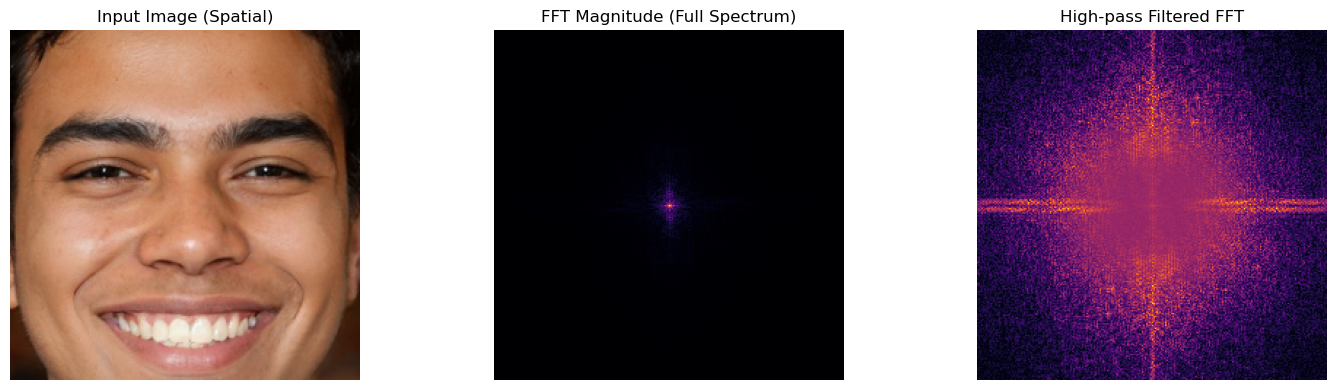

In [5]:
def visualize_frequency(x, fft_mag, fft_filtered):
    # RGB → mean channel cho dễ nhìn
    img = x[0].permute(1, 2, 0).cpu().numpy()
    fft_mag = fft_mag[0].mean(dim=0).cpu().numpy()
    fft_filtered = fft_filtered[0].mean(dim=0).cpu().numpy()

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Input Image (Spatial)")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(fft_mag, cmap="inferno")
    plt.title("FFT Magnitude (Full Spectrum)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(fft_filtered, cmap="inferno")
    plt.title("High-pass Filtered FFT")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


visualize_frequency(x, fft, freq_features)